# Introduction

In this experiment, we will compare two backends for a dictionary, specifically a balanced binary tree and a hash table. In theory, a hash table should be faster for insertions and deletions. We want to find out precisely how much faster.

# Hypothesis

A dictionary using a hash table as it's backend will be Θ(log n) times faster than a dictionary using a balanced binary tree as it's backend, where $n$ is the size of the dictionary. This is because the time complexity for insertion in a balanced binary tree is Θ(log n), while for a hash table, it's Θ(1).

# Methods

We import the necessary modules for our experiment.

In [3]:
import timeit # To time our algorithms
import matplotlib.pyplot as plt # To generate the plots

## Implementing the binary search tree dictionary

We create a BinaryTreeDictionary class to build the dictionary class using binary search tree.

In [4]:
class TreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None

class BinaryTreeDictionary:
    def __init__(self):
        self.root = None

    def _insert(self, node, key, value):
        if node is None:
            return TreeNode(key, value)

        if key < node.key:
            node.left = self._insert(node.left, key, value)
        elif key > node.key:
            node.right = self._insert(node.right, key, value)
        else:
            # Update the value if the key already exists
            node.value = value

        return node

    def add_entry(self, key, value):
        """Add a key-value pair to the dictionary."""
        self.root = self._insert(self.root, key, value)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node.value if node else None

        if key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def get_value(self, key):
        """Retrieve the value associated with a given key."""
        return self._search(self.root, key)



## Implementing the hash table dictionary

Fortunately, the dict data type built into Python uses hash tables as it's backend. So, we don't have to create our own class for it.

## Timing the insertions

We record the time it takes for both data structures to insert data as the size of the dictionaries vary from $0$ to $1000$. For simplicity, we are inserting the current size of the dictionaries as the key, and the letter 'A' as the value.

In [13]:
bst_dict = BinaryTreeDictionary()
ht_dict = dict()
bst_times = []
ht_times = []

for i in range(1000):
    # Timing the bst dictionary's insertion
    start_time = timeit.default_timer()
    bst_dict.add_entry(i, 'A')
    exec_time = timeit.default_timer() - start_time
    bst_times.append(exec_time)

    # Timing the ht dictionary's insertion
    start_time = timeit.default_timer()
    ht_dict[i] = 'A'
    exec_time = timeit.default_timer() - start_time
    ht_times.append(exec_time)
    

# Results

We use a graph plot of both dictionaries' times to compare their speed of insertion.

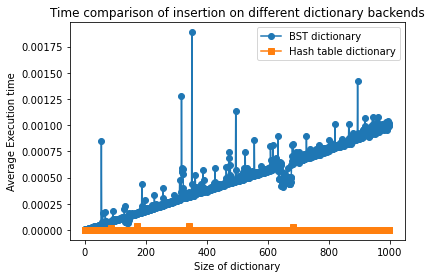

In [15]:
# Plotting the insertion sort execution times
plt.plot(bst_times, label='BST dictionary', marker='o')

# Plotting the merge sort execution times
plt.plot(ht_times, label='Hash table dictionary', marker='s')

# Adding labels and title
plt.xlabel('Size of dictionary')
plt.ylabel('Average Execution time')
plt.title('Time comparison of insertion on different dictionary backends')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

# Discussion

From the above graph, it can be seen that the average execution time for inserting into the BST dictionary increases significantly faster than that for the hash table dictionary with the size of the dictionary. This supports our hypothesis, where we expected the hash table backend to be much faster in insertions than the binary tree. Furthermore, the graph for the BST dictionary appears to be logarithmic, while the graph for the hash table dictionary appears to be constant.

The surprising aspect of this experiment is that the graphs are much less jagged than I expected. Dictionaries, especially ones built using hash tables, are theoretically proved to be unpredictable in terms of the time complexity of their insertions. If a good hash function is not used, the time complexity will not always be Θ(1). This shows that the hash function(s) used by the built in Python dict() datatype is extremely good.

# Conclusion

Under the conditions tested, a hash table dictionary is much faster in inserting data than a BST dictionary, the former having constant time complexity and the latter having logarithmic time complexity.